## Used Cars Selling Price - Linear Regression - Avalons

### ARTIFICIAL INTELLIGENCE CS - 617- A

### Project Phase 1 and 2

#### Team Name: Avalons

#### Team Members:
        1. Samba Chennamsetty - Team Head
        2. Arif Pasha Shaik
        3. Jagadeshwar Reddy Velma
        4. Sai Hrithik Peddi
        5. Vamsi Kiran Kakkera
        6. Kaki Rohit Reddy
        
#### GitHub Repository: https://github.com/samba-chennamsetty/used-car-selling-price-linear-regression

#### Project Name: Used cars selling price

### Step 1: Reading and Understanding the Data
    
    Let's start with the following steps:

     - Importing data using the pandas library
     - Understanding the structure of the data

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
car = pd.read_csv("UsedCarDetails.csv")

In [4]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Adding new variable 

In [5]:
# adding new variable 'current-year' to the car dataframe to calculate car age.
car['current']= 2022

#### Adding new variable age column

In [6]:
# calculating current age.
car['age']=car['current']-car['year']

car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


### Step 2 : Data Cleaning and Preparation

   #### Drop all non required or repeative data

In [7]:
car.drop(['current','year','name'],axis=1,inplace=True)
car.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  4340 non-null   int64 
 1   km_driven      4340 non-null   int64 
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   age            4340 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [9]:
car.shape

(4340, 7)

In [10]:
car.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'age'],
      dtype='object')

In [11]:
car.describe()

,selling_price,km_driven,age
count,4.340000e+03,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,8.909217
std,5.785487e+05,46644.102194,4.215344
min,2.000000e+04,1.000000,2.000000
25%,2.087498e+05,35000.000000,6.000000
50%,3.500000e+05,60000.000000,8.000000
75%,6.000000e+05,90000.000000,11.000000
max,8.900000e+06,806599.000000,30.000000


#### Points to note:

   - Dataset has 4340 rows and 7 columns.
   - Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
   - We will analyse and finalize whether to convert them to categorical or treat as integer.

#### DATA QUALITY CHECK

#### Check for NULL/MISSING values

In [12]:
# percentage of missing values in each column
round(100*(car.isnull().sum()/len(car)),2).sort_values(ascending = False)

selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
age              0.0
dtype: float64

In [13]:
# percentage of missing values in each row
round(100*(car.isnull().sum(axis=1)/len(car)),2).sort_values(ascending = False)

0       0.0
2899    0.0
2885    0.0
2886    0.0
2887    0.0
       ... 
1451    0.0
1452    0.0
1453    0.0
1454    0.0
4339    0.0
Length: 4340, dtype: float64

#### Findings

   - There are no missing / Null values either in columns or rows


Null value - .isnull function is used to check if there is any null values in the dataset.
NUll value is nothing but if there is any data missing at any random location that location is known as null value(Data value does not exist in the dataset)

#### Duplicate Check

In [14]:
car_dub=car.copy()
# Checking for duplicates and dropping the entire duplicate row if any
car_dub.drop_duplicates(subset=None, inplace=True)

In [15]:
car_dub.shape

(3498, 7)

In [16]:
car.shape

(4340, 7)

#### Insights

- The shape after running the drop duplicate command is not same as the original dataframe.



#### Assign non duplicates records to orginal record 

In [17]:
car=car_dub
car.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  3498 non-null   int64 
 1   km_driven      3498 non-null   int64 
 2   fuel           3498 non-null   object
 3   seller_type    3498 non-null   object
 4   transmission   3498 non-null   object
 5   owner          3498 non-null   object
 6   age            3498 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 218.6+ KB


In [19]:
car.shape

(3498, 7)

Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

In [20]:
for col in car:
    print(car[col].value_counts(ascending=False), '\n\n\n')

300000     122
250000     107
350000     104
550000      82
150000      81
          ... 
2595000      1
368000       1
248000       1
641000       1
865000       1
Name: selling_price, Length: 445, dtype: int64 



70000     202
80000     197
120000    192
60000     189
50000     171
         ... 
35925       1
40771       1
30500       1
55800       1
112198      1
Name: km_driven, Length: 770, dtype: int64 



Diesel      1762
Petrol      1676
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64 



Individual          2753
Dealer               712
Trustmark_Dealer      33
Name: seller_type, dtype: int64 



Manual       3187
Automatic     311
Name: transmission, dtype: int64 



First Owner             2157
Second Owner             964
Third Owner              285
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64 



5     336
10    332
7     327
8     315
9     290
4     285
6     273
11    244
12    205
13    167
3     156


#### Insights

- There seems to be no Junk/Unknown values in the entire dataset.

# Creating Dummy Variables
- We will create DUMMY variables for 4 categorical variables

- Before creating dummy variables, we will have to convert them into 'category' data types.

In [21]:
#To hold original data & column after duplicates are removed
car_o=car.copy()

In [22]:
# converting currency.
car['selling_price'] = car['selling_price'] / 83

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  3498 non-null   float64
 1   km_driven      3498 non-null   int64  
 2   fuel           3498 non-null   object 
 3   seller_type    3498 non-null   object 
 4   transmission   3498 non-null   object 
 5   owner          3498 non-null   object 
 6   age            3498 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 218.6+ KB


In [24]:
# Convert to 'category' data type
car['fuel']=car['fuel'].astype('category')
car['seller_type']=car['seller_type'].astype('category')
car['transmission']=car['transmission'].astype('category')
car['owner']=car['owner'].astype('category')

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   selling_price  3498 non-null   float64 
 1   km_driven      3498 non-null   int64   
 2   fuel           3498 non-null   category
 3   seller_type    3498 non-null   category
 4   transmission   3498 non-null   category
 5   owner          3498 non-null   category
 6   age            3498 non-null   int64   
dtypes: category(4), float64(1), int64(2)
memory usage: 123.6 KB


In [26]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

car = pd.get_dummies(car, drop_first=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 3498 non-null   float64
 1   km_driven                     3498 non-null   int64  
 2   age                           3498 non-null   int64  
 3   fuel_Diesel                   3498 non-null   uint8  
 4   fuel_Electric                 3498 non-null   uint8  
 5   fuel_LPG                      3498 non-null   uint8  
 6   fuel_Petrol                   3498 non-null   uint8  
 7   seller_type_Individual        3498 non-null   uint8  
 8   seller_type_Trustmark_Dealer  3498 non-null   uint8  
 9   transmission_Manual           3498 non-null   uint8  
 10  owner_Fourth & Above Owner    3498 non-null   uint8  
 11  owner_Second Owner            3498 non-null   uint8  
 12  owner_Test Drive Car          3498 non-null   uint8  
 13  own

# Splitting the Data
    Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
    We also use train_test_split method from sklearn package.

In [27]:
car.shape

(3498, 14)

In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 3498 non-null   float64
 1   km_driven                     3498 non-null   int64  
 2   age                           3498 non-null   int64  
 3   fuel_Diesel                   3498 non-null   uint8  
 4   fuel_Electric                 3498 non-null   uint8  
 5   fuel_LPG                      3498 non-null   uint8  
 6   fuel_Petrol                   3498 non-null   uint8  
 7   seller_type_Individual        3498 non-null   uint8  
 8   seller_type_Trustmark_Dealer  3498 non-null   uint8  
 9   transmission_Manual           3498 non-null   uint8  
 10  owner_Fourth & Above Owner    3498 non-null   uint8  
 11  owner_Second Owner            3498 non-null   uint8  
 12  owner_Test Drive Car          3498 non-null   uint8  
 13  own

In [29]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.70, test_size = 0.30, random_state = 100)

### Re-Check the info and shape of the dataframes after splitting

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 3797 to 1725
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 2448 non-null   float64
 1   km_driven                     2448 non-null   int64  
 2   age                           2448 non-null   int64  
 3   fuel_Diesel                   2448 non-null   uint8  
 4   fuel_Electric                 2448 non-null   uint8  
 5   fuel_LPG                      2448 non-null   uint8  
 6   fuel_Petrol                   2448 non-null   uint8  
 7   seller_type_Individual        2448 non-null   uint8  
 8   seller_type_Trustmark_Dealer  2448 non-null   uint8  
 9   transmission_Manual           2448 non-null   uint8  
 10  owner_Fourth & Above Owner    2448 non-null   uint8  
 11  owner_Second Owner            2448 non-null   uint8  
 12  owner_Test Drive Car          2448 non-null   uint8  
 13  

In [31]:
df_train.shape

(2448, 14)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 982 to 4291
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 1050 non-null   float64
 1   km_driven                     1050 non-null   int64  
 2   age                           1050 non-null   int64  
 3   fuel_Diesel                   1050 non-null   uint8  
 4   fuel_Electric                 1050 non-null   uint8  
 5   fuel_LPG                      1050 non-null   uint8  
 6   fuel_Petrol                   1050 non-null   uint8  
 7   seller_type_Individual        1050 non-null   uint8  
 8   seller_type_Trustmark_Dealer  1050 non-null   uint8  
 9   transmission_Manual           1050 non-null   uint8  
 10  owner_Fourth & Above Owner    1050 non-null   uint8  
 11  owner_Second Owner            1050 non-null   uint8  
 12  owner_Test Drive Car          1050 non-null   uint8  
 13  o

In [33]:
df_test.shape

(1050, 14)

## EXPLORATORY DATA ANALYSIS
- We need to perform the EDA on TRAINING (df_train) Dataset.


### Visualising Numeric Variables
- Let's make a pairplot of all the numeric variables.

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 3797 to 1725
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 2448 non-null   float64
 1   km_driven                     2448 non-null   int64  
 2   age                           2448 non-null   int64  
 3   fuel_Diesel                   2448 non-null   uint8  
 4   fuel_Electric                 2448 non-null   uint8  
 5   fuel_LPG                      2448 non-null   uint8  
 6   fuel_Petrol                   2448 non-null   uint8  
 7   seller_type_Individual        2448 non-null   uint8  
 8   seller_type_Trustmark_Dealer  2448 non-null   uint8  
 9   transmission_Manual           2448 non-null   uint8  
 10  owner_Fourth & Above Owner    2448 non-null   uint8  
 11  owner_Second Owner            2448 non-null   uint8  
 12  owner_Test Drive Car          2448 non-null   uint8  
 13  

In [35]:
df_train.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark_Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

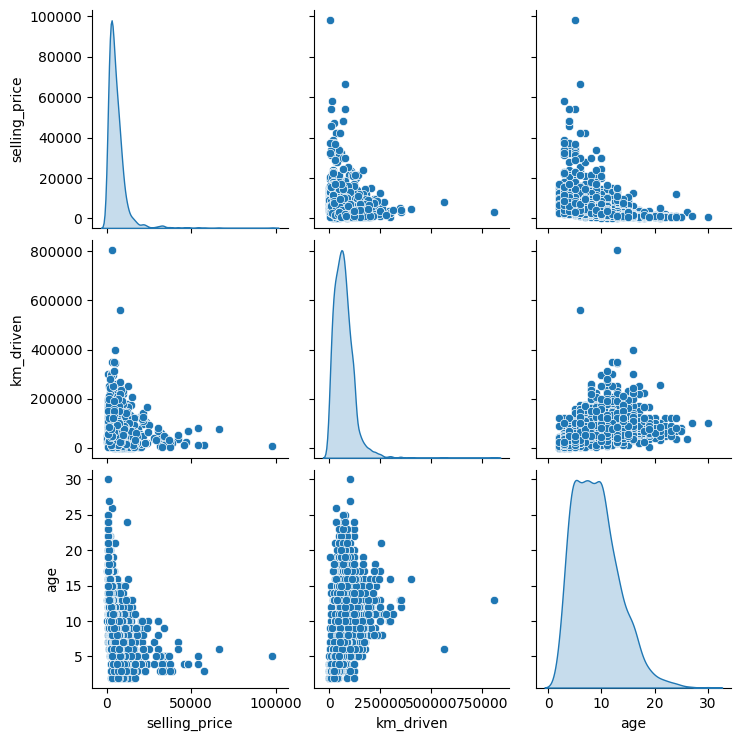

In [36]:
# Create a new dataframe of only numeric variables:

car_n=df_train[[ 'selling_price', 'km_driven', 'age']]

sns.pairplot(car_n, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'selling_price','km_driven' and 'age'

### Visualising Catagorical Variables

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 3797 to 1725
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 2448 non-null   float64
 1   km_driven                     2448 non-null   int64  
 2   age                           2448 non-null   int64  
 3   fuel_Diesel                   2448 non-null   uint8  
 4   fuel_Electric                 2448 non-null   uint8  
 5   fuel_LPG                      2448 non-null   uint8  
 6   fuel_Petrol                   2448 non-null   uint8  
 7   seller_type_Individual        2448 non-null   uint8  
 8   seller_type_Trustmark_Dealer  2448 non-null   uint8  
 9   transmission_Manual           2448 non-null   uint8  
 10  owner_Fourth & Above Owner    2448 non-null   uint8  
 11  owner_Second Owner            2448 non-null   uint8  
 12  owner_Test Drive Car          2448 non-null   uint8  
 13  

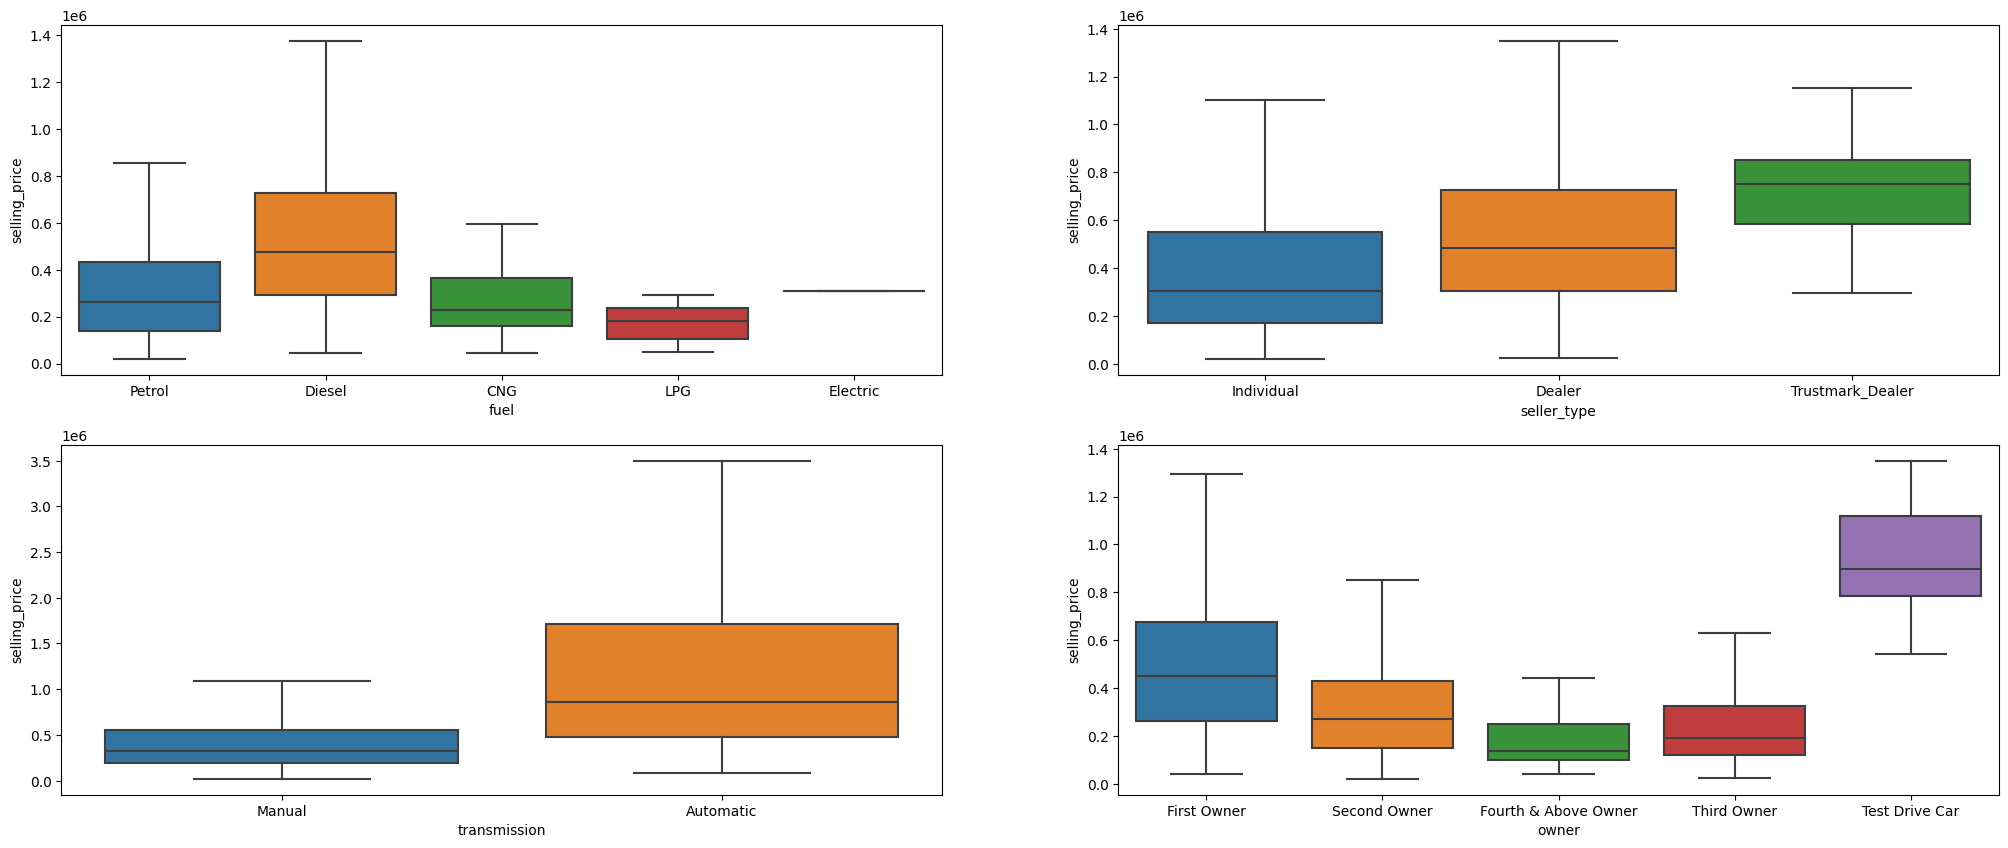

In [38]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'selling_price' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'fuel', y = 'selling_price', data = car_o, showfliers=False)
plt.subplot(2,2,2)
sns.boxplot(x = 'seller_type', y = 'selling_price', data = car_o, showfliers=False)
plt.subplot(2,2,3)
sns.boxplot(x = 'transmission', y = 'selling_price', data = car_o, showfliers=False)
plt.subplot(2,2,4)
sns.boxplot(x = 'owner', y = 'selling_price', data = car_o, showfliers=False)

plt.show()

- There were 4 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘selling_price’) .

The inference that We could derive were:

- **season :** Diesel & Petrol consists of 99% of all available fuel column data available. 
- **transmission :** Manual consists of 91% of all available transmission column data available.
- **seller_type :** Individual consists of 79% of all available seller_type column data available, i.e. highest in all.
- **seller_type :** First Owner consists of 61% of all available owner column data available, i.e. highest in all.



### Step 2 : Data Visualization

### Univaraite Analysis

In [39]:
# variables for plotting.
cont_col =[ 'selling_price','km_driven', 'age']

#### distplot

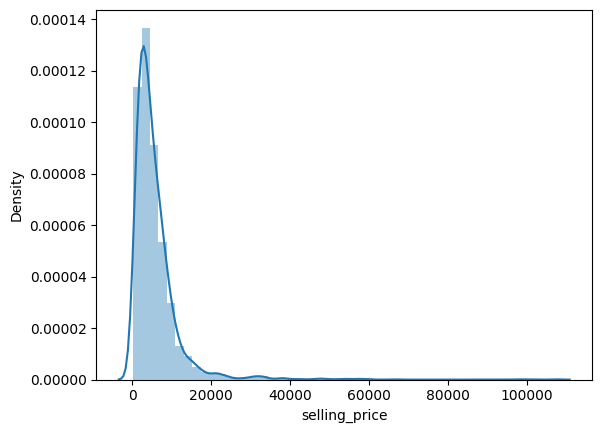

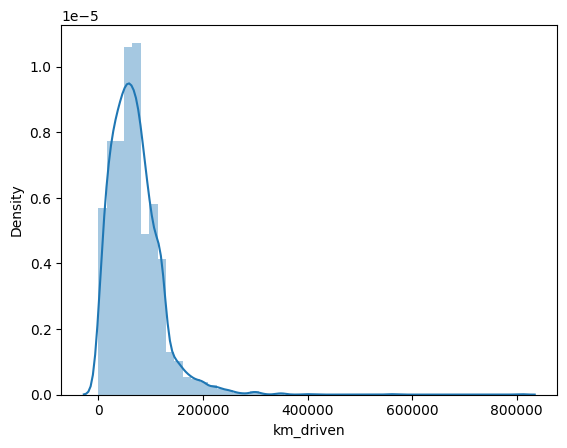

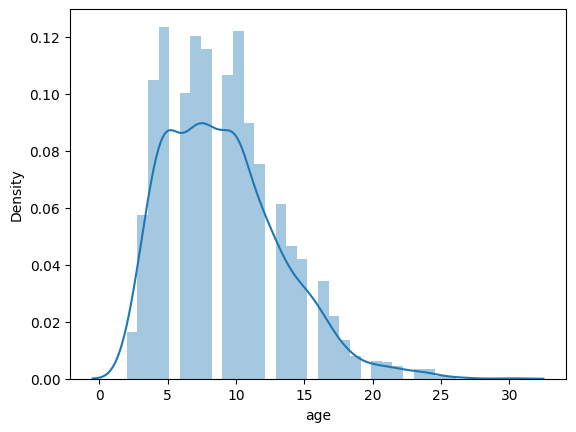

In [40]:
for i in cont_col:
    sns.distplot(car[i])
    plt.show()

#### Inference

- Selling Price and Km Driven have similar kind of distribution, some features are showing near by normal distribution while some are skewed.

#### boxplot

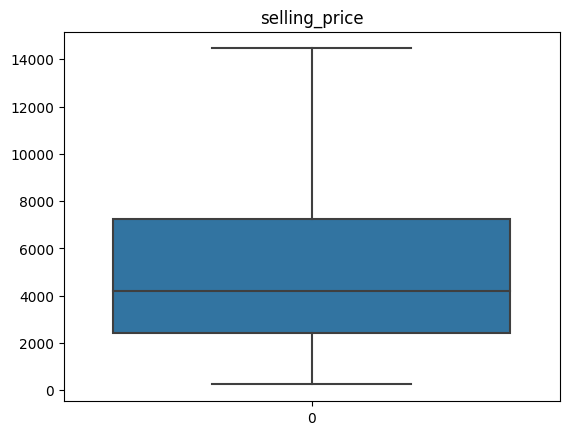

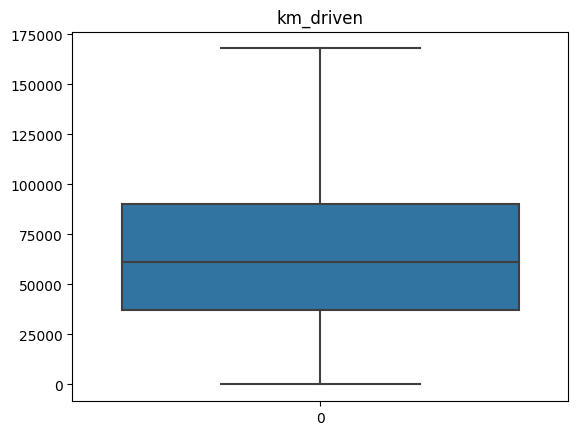

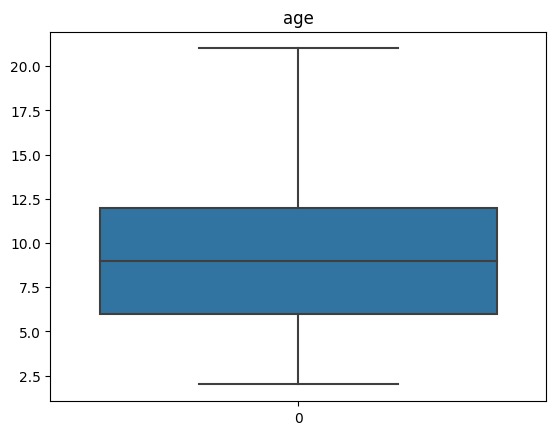

In [41]:
for i in cont_col:
    plt.title(i)
    sns.boxplot(car[i],showfliers=False)
    plt.show()

### Bivaraite Analysis

In [42]:
# variables for plotting
cont_col =[ 'selling_price','km_driven', 'fuel_Petrol']

#### scatter plot

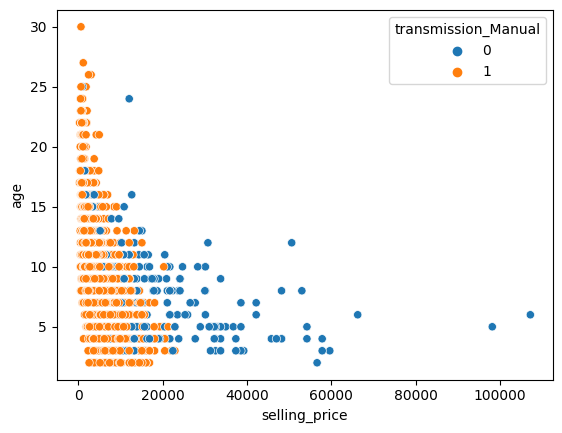

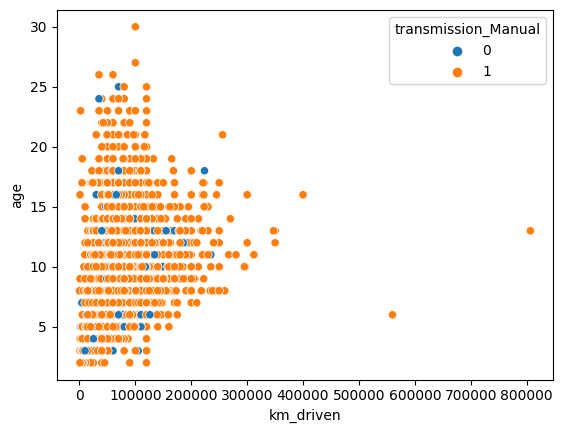

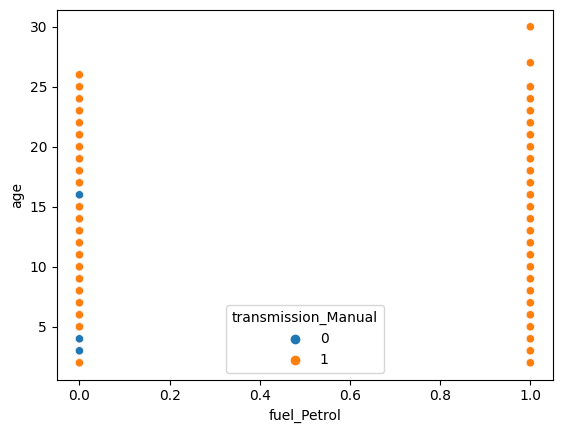

In [43]:
# plotting graph b/w count and continuous columns taking transmission as hue
for i in cont_col:
    sns.scatterplot(data = car[i], x = car[i], y = car['age'], hue=car['transmission_Manual'])
    plt.show()

### Pearson correlation


- Value of ‘r’ ranges from ‘-1’ to ‘+1’. 
- Value ‘0’ specifies that there is no relation between the two variables. 
- A value greater than ‘0’ indicates a positive relationship between two variables where an increase in the value of one variable increases the value of another variable. 
- Value less than ‘0’ indicates a negative relationship between two variables where an increase in the value of one decreases the value of another variable.

![title](pearson-relation.png)


In [44]:
from scipy.stats import pearsonr
corr, _ = pearsonr(car['selling_price'],car['age'])
print("The value of Pearson correlation for Selling Price vs Age is: " + str(corr))

corr2, _ = pearsonr(car['selling_price'],car['km_driven'])
print("The value of Pearson correlation for Selling Price vs Age is: " + str(corr2))

The value of Pearson correlation for Selling Price vs Age is: -0.42405085293069356
The value of Pearson correlation for Selling Price vs Age is: -0.18735641383299767


#### Inference

- The value of Pearson correlation for Selling Price vs Age is -0.424 and as there is no correlation between Selling Price and Age, hence the Pearson Correlation value between Selling Price & Age is less than 0 which is -0.424.


- The value of Pearson correlation for Selling Price vs Km Driven is -0.187 and as there is no correlation between Selling Price and Km Driven, hence the Pearson Correlation value between Selling Price & Km Driven is less than 0 which is -0.187.

### Pair plot

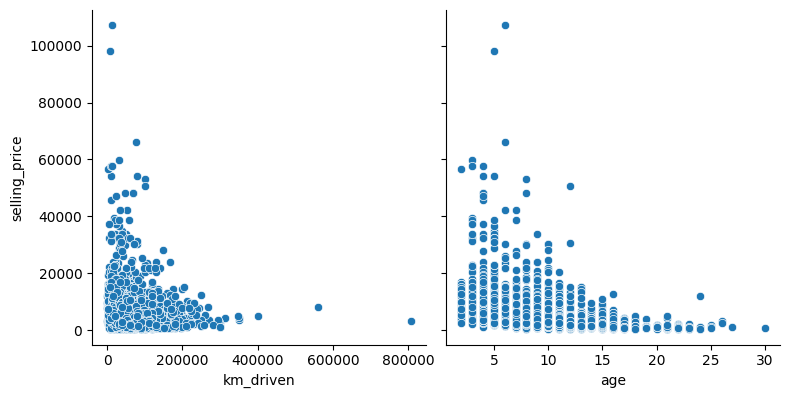

In [45]:
def pp(x,y):
    sns.pairplot(car, x_vars=[x,y], y_vars='selling_price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('km_driven', 'age')


## Correlation Matrix

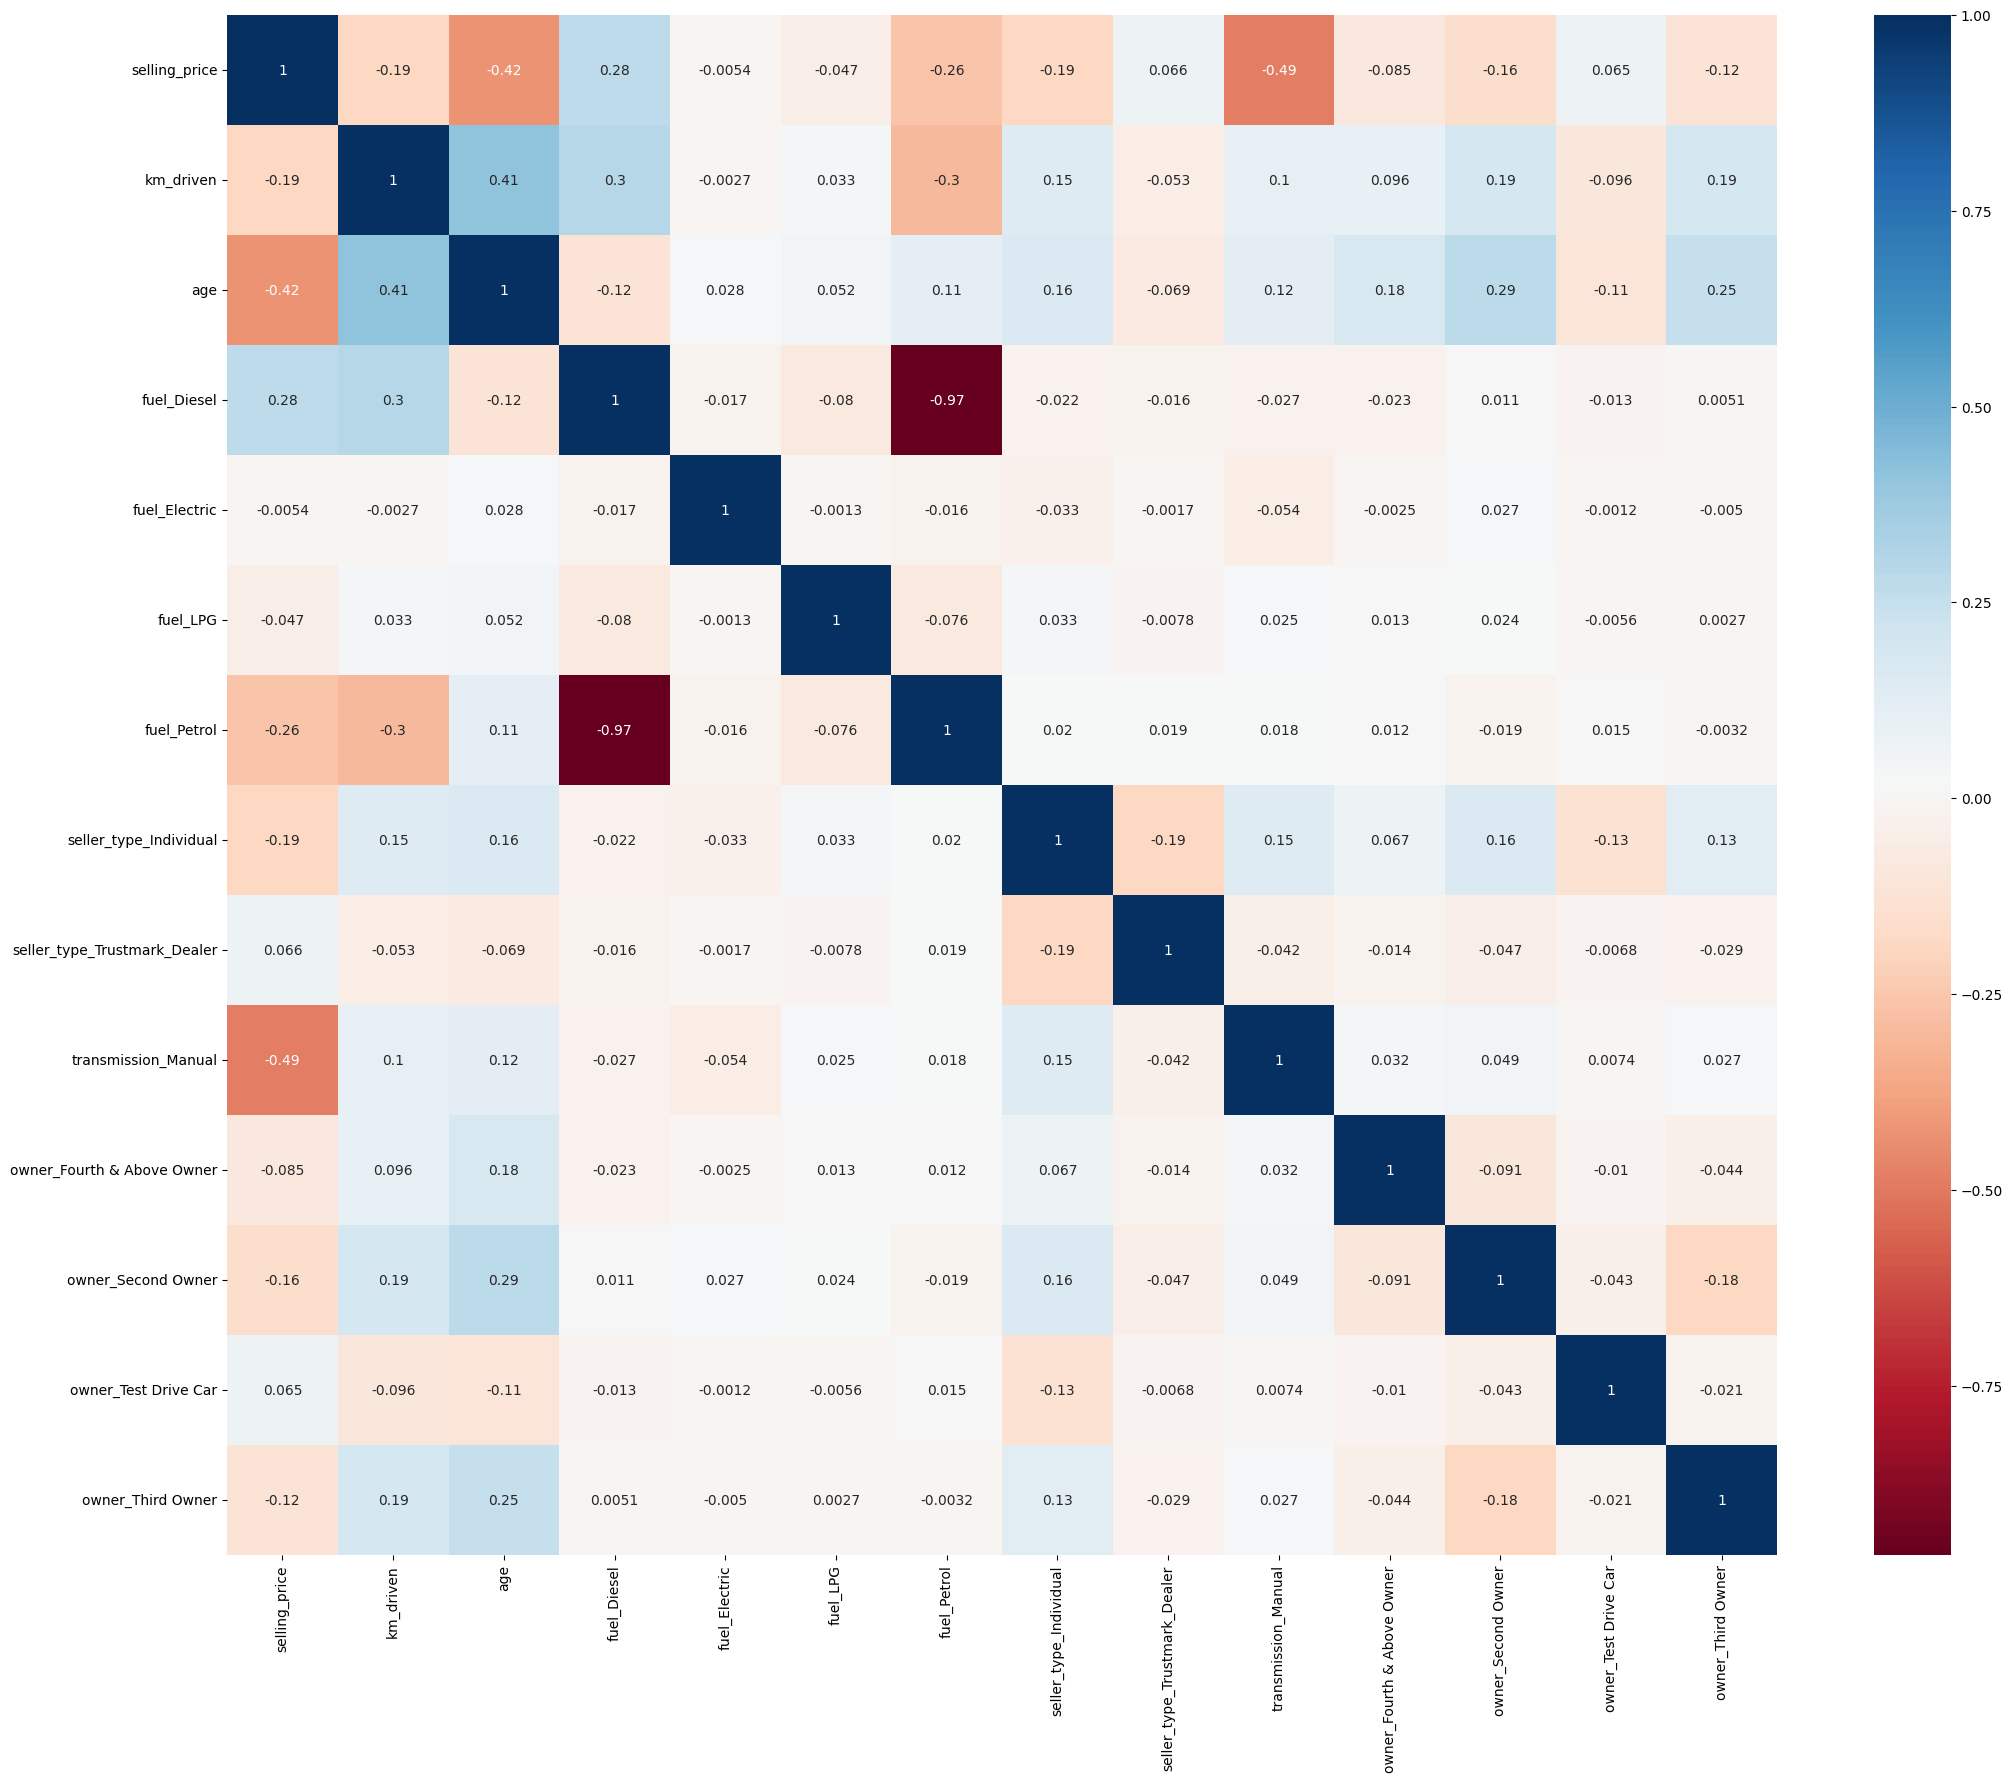

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: car) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(car.corr(), annot = True, cmap="RdBu")
plt.show()

#### Inference

- Each square in the heatmap shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. 
- Values closer to zero means there is no linear trend between the two variables. 
- The values close to 1 the correlation is the more positively correlated.
- A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

## Model Building

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
# Checking the values before scaling
car.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,722.891566,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,1626.506024,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,7228.915663,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,3012.048193,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,5421.686747,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [50]:
car.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark_Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [51]:
 #Apply scaler() to all the numeric variables

num_vars = ['selling_price', 'km_driven', 'age']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [52]:
df_train.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3797,0.015990,0.074270,0.214286,0,0,0,1,1,0,1,0,1,0,0
56,0.089791,0.035833,0.071429,1,0,0,0,0,0,1,0,0,0,0
67,0.016113,0.082657,0.392857,0,0,0,1,0,0,1,0,1,0,0
2710,0.028290,0.086670,0.392857,0,0,0,1,1,0,1,0,0,0,1
3579,0.005535,0.074270,0.321429,0,0,0,1,1,0,1,0,1,0,0


In [53]:
df_train.describe()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,0.055326,0.087130,0.252086,0.501634,0.000408,0.006127,0.479575,0.784314,0.009804,0.912173,0.022059,0.274918,0.004493,0.081291
std,0.059725,0.061750,0.151644,0.500099,0.020211,0.078054,0.499685,0.411382,0.098548,0.283101,0.146905,0.446564,0.066896,0.273337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022140,0.045752,0.142857,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.040590,0.078360,0.250000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.071341,0.111468,0.357143,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [54]:
#>>>>> Define train and test
X=df_train.loc[:,['selling_price','km_driven', 'age', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark_Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]
y=df_train.pop('fuel_Petrol')
y

3797    1
56      0
67      1
2710    1
3579    1
       ..
2207    1
92      1
2116    0
3460    1
1725    1
Name: fuel_Petrol, Length: 2448, dtype: uint8

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train size:',X_train.shape)
print('X_test size:',X_test.shape)

print('X_train size:',y_train.shape)
print('X_test size:',y_test.shape)

X_train size: (1958, 14)
X_test size: (490, 14)
X_train size: (1958,)
X_test size: (490,)


#### Create a model

In [56]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
LR = LogisticRegression(solver='lbfgs', max_iter=10000) # we adjusted the maximum iteration
model = LogisticRegression(random_state=0).fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=6)

#### Train the model

In [57]:
LR.fit(X_train, y_train)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

#### Step6: Exploration or Prediction

In [58]:
predictionsLR= LR.predict(X_test)
predictionsKNN= KNN.predict(X_test)

 the accuracy of LR and KNN are 1.0 and 1.0 , respectively
LR model details
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       236

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

TN = 254, FP = 0, FN = 0, TP= 236
KNN model details
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       236

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

TN = 254, FP = 0, FN = 0, TP= 236


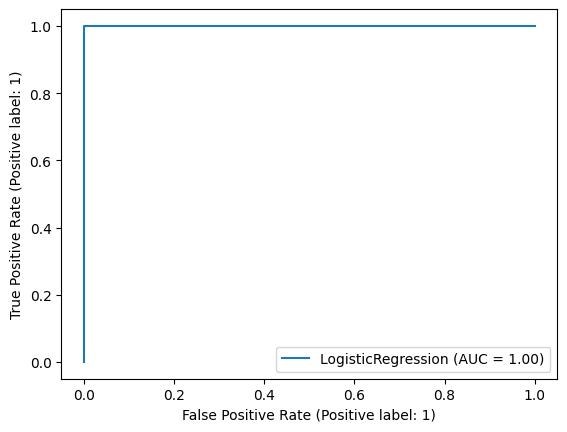

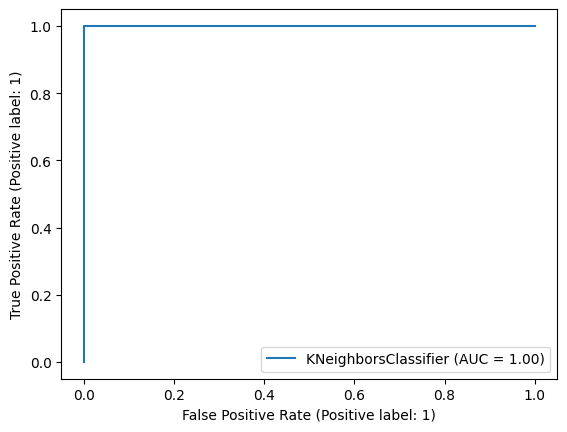

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve
# print accuracy
scoreLR = accuracy_score(y_test, predictionsLR)
scoreKNN = accuracy_score(y_test, predictionsKNN)
print(f' the accuracy of LR and KNN are {scoreLR} and {scoreKNN} , respectively')
# print confusion matrix including precision, recall, f1-score
print("LR model details")
print(classification_report(y_test, predictionsLR))
tn, fp, fn, tp = confusion_matrix(y_test, predictionsLR).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP= {tp}')
plot_roc_curve(LR, X_test, y_test) 

print("KNN model details")
print(classification_report(y_test, predictionsKNN))
tn, fp, fn, tp = confusion_matrix(y_test, predictionsKNN).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP= {tp}')
plot_roc_curve(KNN, X_test, y_test) 

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [60]:
y_train = df_train.pop('selling_price')
X_train = df_train

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Running RFE with the output number of the variable equal to 7
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 20)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('km_driven', True, 1),
 ('age', True, 1),
 ('fuel_Diesel', True, 1),
 ('fuel_Electric', True, 1),
 ('fuel_LPG', False, 2),
 ('seller_type_Individual', False, 2),
 ('seller_type_Trustmark_Dealer', False, 2),
 ('transmission_Manual', True, 1),
 ('owner_Fourth & Above Owner', False, 2),
 ('owner_Second Owner', False, 2),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', False, 2)]

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['km_driven', 'age', 'fuel_Diesel', 'fuel_Electric',
       'transmission_Manual', 'owner_Test Drive Car'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['fuel_LPG', 'seller_type_Individual', 'seller_type_Trustmark_Dealer',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner'],
      dtype='object')

In [66]:
# Creating X_test dataframe with RFE selected variables
X_test = X_train[col]

## Model 1

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_test.columns
vif['VIF'] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,age,4.43
4,transmission_Manual,4.28
0,km_driven,4.22
2,fuel_Diesel,2.20
5,owner_Test Drive Car,1.01
3,fuel_Electric,1.00


In [68]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_test)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [69]:
# Check the parameters obtained

lr1.params

const                   0.159121
km_driven              -0.079821
age                    -0.131424
fuel_Diesel             0.032258
fuel_Electric          -0.051612
transmission_Manual    -0.087679
owner_Test Drive Car    0.023878
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.98e-297
Time:                        04:34:30   Log-Likelihood:                 4122.4
No. Observations:                2448   AIC:                            -8231.
Df Residuals:                    2441   BIC:                            -8190.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1591 

## Model 2
- Removing the variable 'fuel_Electric' based on its High p-value 

In [71]:
X_train_new = X_test.drop(["fuel_Electric"], axis = 1)

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,age,4.42
3,transmission_Manual,4.27
0,km_driven,4.22
2,fuel_Diesel,2.20
4,owner_Test Drive Car,1.01


In [73]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [74]:
# Check the parameters obtained

lr2.params

const                   0.158916
km_driven              -0.079647
age                    -0.131720
fuel_Diesel             0.032285
transmission_Manual    -0.087426
owner_Test Drive Car    0.023847
dtype: float64

In [75]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     374.3
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.87e-298
Time:                        04:34:30   Log-Likelihood:                 4121.8
No. Observations:                2448   AIC:                            -8232.
Df Residuals:                    2442   BIC:                            -8197.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1589 

## Model 3  
- Removing the variable 'owner_Test Drive Car' based on its High p-value

In [76]:
X_train_new = X_train_new.drop(["owner_Test Drive Car"], axis = 1)

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,age,4.41
3,transmission_Manual,4.23
0,km_driven,4.21
2,fuel_Diesel,2.20


In [78]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [79]:
# Check the parameters obtained

lr3.params

const                  0.159292
km_driven             -0.081104
age                   -0.132559
fuel_Diesel            0.032289
transmission_Manual   -0.087353
dtype: float64

In [80]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     466.7
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          3.70e-299
Time:                        04:34:30   Log-Likelihood:                 4120.3
No. Observations:                2448   AIC:                            -8231.
Df Residuals:                    2443   BIC:                            -8202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1593    

## Model 4
-Removing the variable 'transmission_Manual' based on its High p-value

In [81]:
X_train_new = X_train_new.drop(["transmission_Manual"], axis = 1)

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,km_driven,4.10
1,age,3.07
2,fuel_Diesel,1.96


In [83]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [84]:
# Check the parameters obtained

lr4.params

const          0.084509
km_driven     -0.112119
age           -0.143643
fuel_Diesel    0.033483
dtype: float64

In [85]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     292.6
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          2.78e-162
Time:                        04:34:31   Log-Likelihood:                 3801.0
No. Observations:                2448   AIC:                            -7594.
Df Residuals:                    2444   BIC:                            -7571.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0845      0.002     35.252      

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation

## Hypothesis Testing:

### Hypothesis testing states that:

- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0

lr4 model coefficient values
- const                  0.159292
- km_driven             -0.081104
- age                   -0.132559
- fuel_Diesel            0.032289
- transmission_Manual   -0.087353

### Insights
- From the lr4  model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

### F Statistics

#### F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic:                     466.7
- Prob (F-statistic):          3.70e-299
The F-Statistics value of 466.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## The equation of best fitted surface based on model lr4:

**selling_price** = 0.159292 - (**km_driven** * **0.081104**) - (**age** * 0.132559) + ( **fuel_Diesel** * 0.032289) - ( **transmission_Manual** * 0.087353)

### Interpretation of Coefficients:

- **km_driven**: A coefficient value of ‘0.081104’ indicated that a unit increase in km_driven variable, decreases the selling_price numbers by 0.081104 units.

- **age**: A coefficient value of ‘-0.132559’ indicated that, a unit increase in age  variable, decreases the selling_price numbers by 0.132559 units.

- **fuel_Diesel**: A coefficient value of ‘0.032289’ indicated that w.r.t Petrol, a unit increase in fuel_Diesel variable increases the selling_price numbers by 0.032289 units.

- **transmission_Manual**: A coefficient value of ‘-0.087353’ indicated that w.r.t Automatic, a unit increase in transmission_Manual variable decreases the selling_price numbers by 0.087353 units.

##  ASSUMPTIONS

- Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Error terms are normally distributed with mean zero (not X, Y)

- Residual Analysis Of Training Data

In [86]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

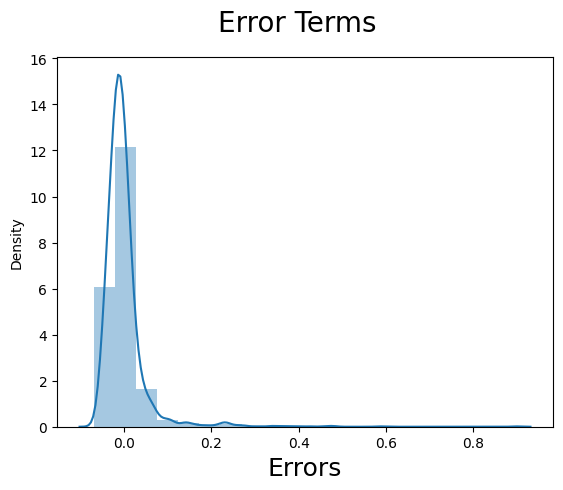

In [87]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

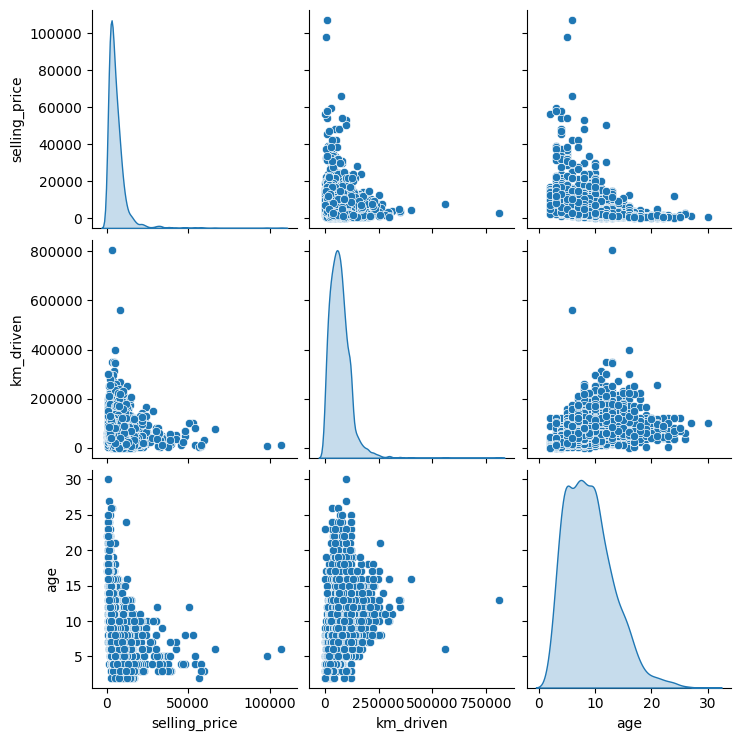

In [88]:
car_n=car[[ 'selling_price', 'km_driven', 'age']]

sns.pairplot(car_n, diag_kind='kde')
plt.show()

### Insight
- Using the pair plot, we could see there is a linear relation between km_driven and age variable with the predictor ‘selling_price’.### Insight
- Using the pair plot, we could see there is a linear relation between km_driven and age variable with the predictor ‘selling_price’.

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,km_driven,4.10
1,age,3.07
2,fuel_Diesel,1.96


### Insight
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL


Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr4)

### Applying the scaling on the test sets

In [90]:
#Apply scaler() to all the numeric variables

num_vars = ['selling_price', 'km_driven', 'age']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [91]:
df_test.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
982,0.073553,0.219997,0.208333,0,0,0,1,1,0,1,0,0,0,0
2309,0.025681,0.063330,0.125000,0,0,0,1,1,0,1,0,0,0,0
1025,0.008223,0.233331,0.375000,1,0,0,0,1,0,1,0,0,0,0
3744,0.038635,0.399998,0.291667,1,0,0,0,1,0,1,0,0,0,0
1552,0.017234,0.453332,0.458333,1,0,0,0,1,0,1,0,1,0,0


In [92]:
df_test.describe()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.0,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.052495,0.225113,0.294524,0.508571,0.0,0.006667,0.478095,0.793333,0.008571,0.908571,0.020000,0.277143,0.005714,0.081905
std,0.064583,0.142527,0.178533,0.500165,0.0,0.081416,0.499758,0.405107,0.092228,0.288355,0.140067,0.447801,0.075413,0.274350
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020050,0.120830,0.166667,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.036157,0.199997,0.250000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.064908,0.299998,0.416667,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [93]:
y_test = df_test.pop('selling_price')
X_test = df_test
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 982 to 4291
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     1050 non-null   float64
 1   age                           1050 non-null   float64
 2   fuel_Diesel                   1050 non-null   uint8  
 3   fuel_Electric                 1050 non-null   uint8  
 4   fuel_LPG                      1050 non-null   uint8  
 5   fuel_Petrol                   1050 non-null   uint8  
 6   seller_type_Individual        1050 non-null   uint8  
 7   seller_type_Trustmark_Dealer  1050 non-null   uint8  
 8   transmission_Manual           1050 non-null   uint8  
 9   owner_Fourth & Above Owner    1050 non-null   uint8  
 10  owner_Second Owner            1050 non-null   uint8  
 11  owner_Test Drive Car          1050 non-null   uint8  
 12  owner_Third Owner             1050 non-null   uint8  
dtypes

In [94]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 982 to 4291
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        1050 non-null   float64
 1   km_driven    1050 non-null   float64
 2   age          1050 non-null   float64
 3   fuel_Diesel  1050 non-null   uint8  
dtypes: float64(3), uint8(1)
memory usage: 33.8 KB


In [95]:
# Making predictions using the final model (lr6)

y_pred = lr4.predict(X_test_lm4)

# MODEL EVALUATION

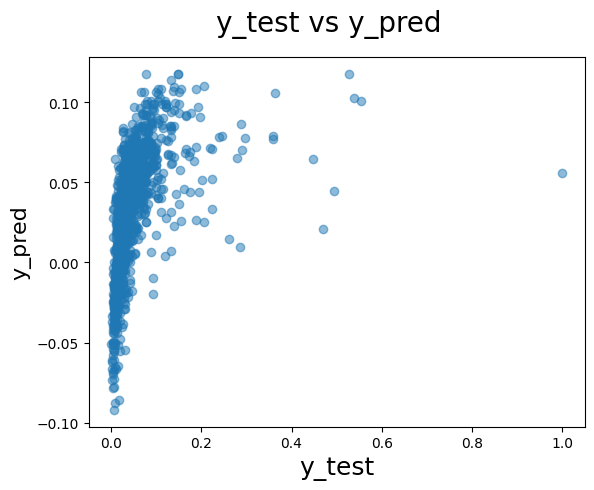

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.10120230640676553

### Adjusted R^2 Value for TEST

In [98]:
# We already have the value of R^2 (calculated in above step)

r2=0.3618371256083056 

In [99]:
# Get the shape of X_test
X_test.shape

(1050, 3)

In [100]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.36000683055746896

### Final Result Comparison
- Train R^2 :0.433
- Train Adjusted R^2 :0.432
- Test R^2 :0.362 
- Test Adjusted R^2 :0.360

This seems to be a really good model that can moderate 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top predictor variables that influences the selling_prize are:
- **km_driven**: A coefficient value of ‘0.081104’ indicated that a unit increase in km_driven variable, decreases the selling_price numbers by 0.081104 units.

- **age**: A coefficient value of ‘-0.132559’ indicated that, a unit increase in age  variable, decreases the selling_price numbers by 0.132559 units.

- **fuel_Diesel**: A coefficient value of ‘0.032289’ indicated that w.r.t Petrol, a unit increase in fuel_Diesel variable increases the selling_price numbers by 0.032289 units.

- **transmission_Manual**: A coefficient value of ‘-0.087353’ indicated that w.r.t Automatic, a unit increase in transmission_Manual variable decreases the selling_price numbers by 0.087353 units.